In [8]:
# v8: EaseMyTrip data

In [9]:
!pip install prophet

In [10]:
import prophet as p
import pandas as pd

In [11]:
import glob
g=glob.glob('../input/easemytrip-ff-sample-data-processed/EaseMyTrip.csv')

In [12]:
#!pip install openpyxl

In [13]:
df=pd.read_csv(g[0])
#m = p.Prophet()
#m.fit(df)
df.columns

Index(['Unnamed: 0', 'Number Of Stops', 'Fare', 'Days Left', 'Departure_day',
       'Departure_month', 'Departure_year', 'Departure_hour',
       'Departure_minute', 'F1_Air Canada',
       ...
       'Layover1_Tiruchirapally', 'Layover1_Tirupati', 'Layover1_Tokyo',
       'Layover1_Udaipur', 'Layover1_VDY', 'Layover1_Vadodara',
       'Layover1_Varanasi', 'Layover1_Vijayawada', 'Layover1_Vishakhapatnam',
       'Layover1_Warsaw'],
      dtype='object', length=366)

In [14]:
df1=df[["Fare"]].copy()
df1.columns

Index(['Fare'], dtype='object')

In [20]:
df2=df[['Departure_year','Departure_month','Departure_day']].copy()
df2.columns

Index(['Departure_year', 'Departure_month', 'Departure_day'], dtype='object')

In [21]:
df2.columns=['Year','month','day']
df2.head()

,Year,month,day
0,2020,4,23
1,2020,4,16
2,2020,4,18
3,2020,4,27
4,2020,4,18


In [22]:
df1['ds']=pd.to_datetime(df2[['Year','month','day']])

In [23]:
df1.columns=['y','ds']

In [24]:
df1.head()

,y,ds
0,4378.0,2020-04-23
1,5226.0,2020-04-16
2,3333.0,2020-04-18
3,3563.0,2020-04-27
4,5309.0,2020-04-18


In [25]:
m = p.Prophet()
m.fit(df1)

In [26]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
366,2021-04-23
367,2021-04-24
368,2021-04-25
369,2021-04-26
370,2021-04-27


In [27]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
366,2021-04-23,-124230.255066,-606048.765533,389774.453374
367,2021-04-24,-124598.970475,-604318.010856,387670.297455
368,2021-04-25,-124967.685883,-616863.034913,388336.174907
369,2021-04-26,-125336.401291,-615713.269859,385744.473603
370,2021-04-27,-125705.116700,-609882.247079,389533.969781


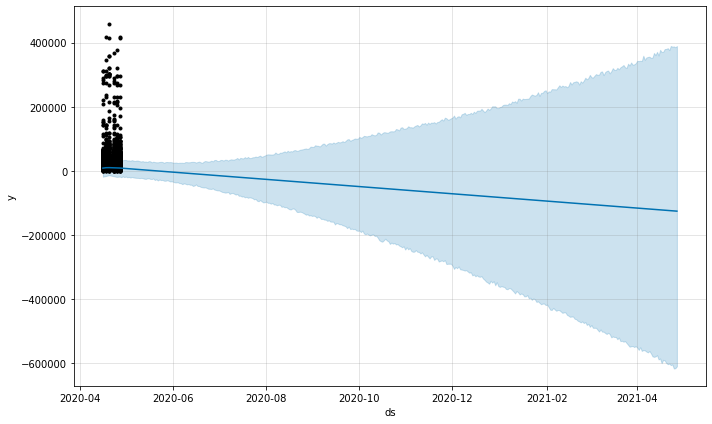

In [28]:
fig1 = m.plot(forecast)
